In [73]:

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rcParams["font.family"] = "sans-serif"
import pandas as pd
import numpy as np
import traitlets
import ipywidgets
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact


       In 2016, ProPublica and The Boston Globe asked states for records of every child who died from child abuse between 2011 and 2015.
       In each record, CAPTA asked states to list the age and gender of the child, and information about a household’s prior contact with welfare services. The information is supposed to help government agencies prevent child abuse, neglect and death.
       I have already done some data cleaning to the original data.Here is the data downloaded from ProPublica Data Store. Services_provided refers to whether services previously have been provided or not.


In [174]:
CAPTA=pd.read_csv("CAPTAclean.csv",encoding='gbk')
CAPTA

,id,DBN,state,city_or_county_of_death,year_fy,age,gender,cause_of_death,services_provided,urls
0,1,AK-F-001,AK,-,2011,0,F,-,N,https://www.documentcloud.org/documents/599480...
1,2,AK-F-002,AK,-,2011,3,M,-,N,https://www.documentcloud.org/documents/599480...
2,3,AK-F-003,AK,-,2011,1,M,-,Y,https://www.documentcloud.org/documents/599480...
3,4,AK-F-004,AK,-,2012,3,F,-,Y,https://www.documentcloud.org/documents/599480...
4,5,AK-F-005,AK,-,2012,2,M,-,-,https://www.documentcloud.org/documents/599480...
...,...,...,...,...,...,...,...,...,...,...
6506,6507,WV-F-021,WV,Kanawha County,2015,2,M,Records from the state Bureau for Children and...,Y,https://www.documentcloud.org/documents/599966...
6507,6508,WV-F-022,WV,Boone County,2015,0,F,Records from the state Bureau for Children and...,-,https://www.documentcloud.org/documents/599966...
6508,6509,WV-F-023,WV,Greenbreir County,2015,14,M,"Lack of supervision, overdose.",-,https://www.documentcloud.org/documents/599967...
6509,6510,WV-F-024,WV,Raleigh County,2015,0,F,Unsafe sleep.,-,https://www.documentcloud.org/documents/599967...


       Since the type of most of the data here is categorical, instead of finding relstionships between variables,  I am curious about how the data is distributed. In other word, I am interested in questions such as which state has most deaths? Or does service provided infect the death? Therefore, I  select all categorical variables of data and name it CAPTA_categorical.

In [84]:
CAPTA_categorical = CAPTA[["state", "year_fy", "age", "gender", "services_provided"]]
CAPTA_categorical

,state,year_fy,age,gender,services_provided
0,AK,2011,0,F,N
1,AK,2011,3,M,N
2,AK,2011,1,M,Y
3,AK,2012,3,F,Y
4,AK,2012,2,M,-
...,...,...,...,...,...
6506,WV,2015,2,M,Y
6507,WV,2015,0,F,-
6508,WV,2015,14,M,-
6509,WV,2015,0,F,-


       I am not sure about choosing which column to discuss, so I first use ipywidgets to create an interactive bar chart which enables me to select the column and see each of them looks like and then dicide which one to go deeper.   
       From the bar chart below, Texas had most children die from maltreatment and abuse recorded from 2011-2015.Then was Florida and Georgia. Moreover, the number of deaths experienced a sharp decline in 2016.And age of 0 accounted for the most. From the plot, males are more than females.However, the difference is slight and normal. 
       What I am interested in is the service_provided column. Services previously have been provided(Y) were more than serivices not provided before.I use group by to count how many death cases once have been provided services.2170 have been provided services before and 118 have not. Is this happened because there existed a outlier in a certain year？

In [170]:
bins_itext = ipywidgets.IntText()
bins_itext.value = 100
@ipywidgets.interact(column = CAPTA_categorical.columns, bins = bins_itext)
def creat_hist(column, bins):
    fig,ax = plt.subplots(figsize=(10,6))
    ax.hist(x=CAPTA_categorical[column], bins = bins,color='blue', alpha=0.4)
    ax.set_xlabel(column)
    plt.show()

interactive(children=(Dropdown(description='column', options=('state', 'year_fy', 'age', 'gender', 'services_p…

In [175]:
grouped = CAPTA_categorical.groupby('services_provided')
count_by_services_provided=grouped['services_provided'].count()
count_by_services_provided = {'services_provided':count_by_services_provided.index,'count':count_by_services_provided.values}
count_by_services_provided = pd.DataFrame(count_by_services_provided)
count_by_services_provided
x_data =['Not sure','N','Y','Y']
plt.bar(x=x_data, height=count_by_services_provided['count'],
color='indianred', alpha=0.3, width=bar_width)
plt.title("Service provided or not from 2011-2015")
plt.xlabel("Yes or No")
plt.ylabel("Provided or not")

,services_provided,count
0,-,4223
1,N,118
2,Y,2169
3,Y,1


       Then I go deeper in each year's data.I first use group by to get every year's details about the provided service. And then I create a bar chart of death cases between 2011-2015. Each bar has two groups: one is service-provided and the other is service-not-provided before.The purple one stands for service_provided_before while pink one stands for service_not_provided_before. Surprisely, from 2011-2015, among every year' s reported death cases, cases have been provided service are far more than cases that have not been provided service. This makes me start to think about the reason behind it.My guess is that if the cases have been provided service before, it means the abuse may repeat again and again.The current intervention of facility is not enough to stop the abusement. In order to prevent child abuse, neglect and death, further efforts should be taken by government. 

In [98]:
CAPTA_categorical.groupby(['year_fy']).count().reset_index()


,year_fy,state,age,gender,services_provided
0,-,61,61,61,61
1,2011,1213,1213,1213,1213
2,2012,1205,1205,1205,1205
3,2013,1251,1251,1251,1251
4,2014,1320,1320,1320,1320
5,2015,1365,1365,1365,1365
6,2016,96,96,96,96


In [176]:
services_provided_before=CAPTA_categorical.loc[ (CAPTA_categorical['services_provided'] == 'Y')]
services_provided_before=services_provided_before.groupby(['year_fy']).count().reset_index()

In [177]:
not_provided_before=CAPTA_categorical.loc[(CAPTA_categorical['services_provided'] =='N')]
not_provided_before=not_provided_before.groupby(['year_fy']).count().reset_index()

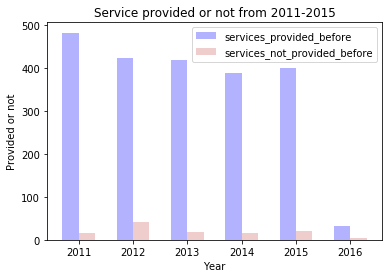

In [167]:
import numpy as np
x_data = ['2011', '2012', '2013', '2014', '2015', '2016']
y_data = [483, 425, 420, 388, 401, 32]
y_data2 = [16, 42, 19, 16, 20, 5]
bar_width=0.3
plt.bar(x=range(len(x_data)), height=y_data, label='services_provided_before',
color='blue', alpha=0.3, width=bar_width)
plt.bar(x=np.arange(len(x_data))+bar_width, height=y_data2,
label='services_not_provided_before', color='indianred', alpha=0.3, width=bar_width)
plt.xticks(np.arange(len(x_data))+bar_width/2, x_data)
plt.title("Service provided or not from 2011-2015")
plt.xlabel("Year")
plt.ylabel("Provided or not")
plt.legend()
plt.show()


The data is from https://projects.propublica.org/graphics/child-abuse.
Sources: Arizona, Freedom of Information Act requests; Arkansas, Florida, Indiana, New Jersey, North Dakota, Washington and Wisconsin child welfare agencies.